In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
def chi_sq(x, y, err):
    function = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(function, xdata=x, ydata=y, sigma=err)

    sigma_a = np.sqrt(pcov[0, 0])
    sigma_b = np.sqrt(pcov[1, 1])

    return popt[0], popt[1], sigma_a, sigma_b

In [3]:
sns.set_theme()

In [4]:
data = pd.read_excel('Kompyuternaya_Gamma-Spektroskopia.xlsx')

In [5]:
data

,Unnamed: 0,Co60,Unnamed: 2,Am241,Unnamed: 4,Cs137,Unnamed: 6,Na22,Unnamed: 8,Eu152,Unnamed: 10,Unnamed: 11
0,1ый пик,1638.0,1.173,115.0,NaN,121.0,NaN,752.0,NaN,135.0,NaN,NaN
1,2ой пик,1847.0,1.332,162.0,NaN,957.0,NaN,1779.0,NaN,244.0,NaN,NaN
2,NaN,209.0,NaN,47.0,NaN,836.0,NaN,1027.0,NaN,109.0,NaN,405.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1103.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1347.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1534.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953.0


In [6]:
Eh_co = 0.08 #MeV
Er_co = 0.21 #MeV
Ek_co = 0.9 #MeV
E_co = [1.173, 1.332]
N_co = [1638, 1847]

In [7]:
Er_cs = 184.5 #KeV
E_cs = [0.662]
N_cs = [957]

In [8]:
E_na = [0.511, 1.275]
N_na = [752, 1779]

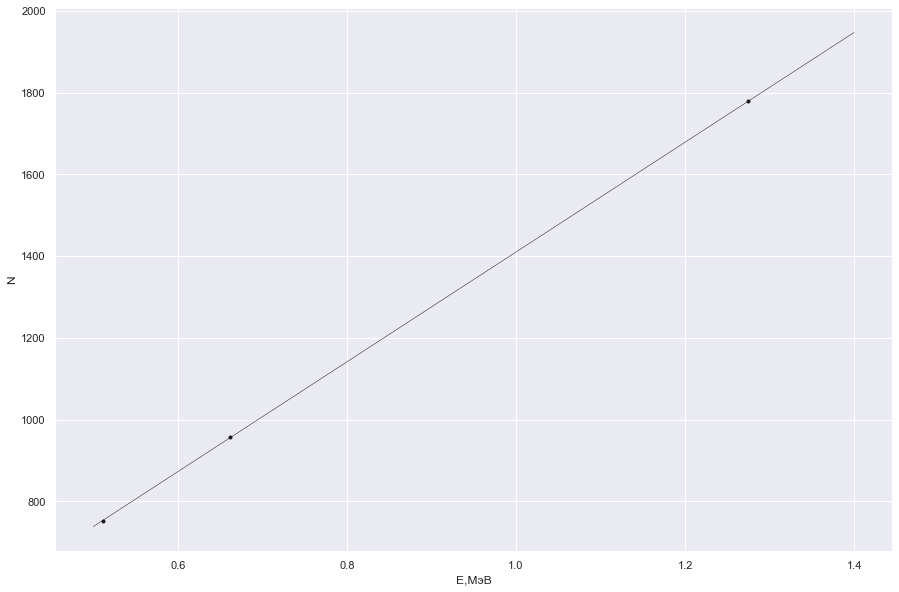

In [9]:
plt.rcParams["figure.figsize"] = (15,10)
E = [0.511, 1.275,0.662]
N = [752, 1779, 957]

a,b,s,e = chi_sq(E, N, None)
x = np.linspace(0.5, 1.4, 100)
y = a * x + b
plt.plot(x,y,lw=0.5,color='k')
plt.xlabel('E,МэВ')
plt.ylabel('N')
plt.scatter(E, N, color = 'k', marker = '.')

In [43]:
a, b, s, e

(1343.2909210836121, 66.54127508057023, 2.720804456904536, 2.3952302954046902)

In [11]:
N_am = [115, 162]
N_eu = [135, 244, 405, 533, 1103, 1347, 1534, 1953]


In [12]:
B = np.ones(2) * b
A = np.ones(2) * a
E_am = (N_am - B) / A

In [13]:
E_am

array([0.03607463, 0.07106333])

In [14]:
B = np.ones(8) * b
A = np.ones(8) * a
E_eu = (N_eu - B) / A

In [15]:
E_eu

array([0.05096344, 0.13210744, 0.25196234, 0.34725071, 0.77158172,
       0.95322518, 1.09243553, 1.40435604])

In [16]:
B = np.ones(2) * b
A = np.ones(2) * a
dN_am = [18, 14]
dE_am = (dN_am - B)/A

In [17]:
dE_am

array([-0.03613609, -0.03911385])

In [18]:
dN_cs = [41, 78]
dE_cs = (dN_cs - B)/A

In [19]:
dE_cs

array([-0.01901396,  0.00853034])

In [20]:
E_cs = (121 - b)/a

In [21]:
E_cs

0.04054127372162893

In [22]:
E_cs = [0.0377, 0.661]

In [23]:
dN_na = [64, 104]
dE_na = (dN_na - B)/A

In [24]:
dE_na

array([-0.00189183,  0.02788579])

In [25]:
dN_eu = [21, 24, 37, 47, 83, 81, 81, 111]
B = np.ones(8) * b
A = np.ones(8) * a
dE_eu = (dN_eu - B)/A

In [26]:
dE_eu

array([-0.03390276, -0.03166944, -0.02199172, -0.01454731,  0.01225254,
        0.01076366,  0.01076366,  0.03309687])

In [27]:
dN_co = [78, 100]
B = np.ones(2) * b
A = np.ones(2) * a
dE_co = (dN_co - B)/A

In [28]:
dE_co

array([0.00853034, 0.02490803])

In [29]:
R_co = dE_co/E_co
R_na = dE_na/E_na
R_am = dE_am/E_am
R_eu = dE_eu/E_eu
R_cs = dE_cs/E_cs

In [30]:
R_co, R_na, R_am, R_eu, R_cs

(array([0.00727224, 0.01869972]),
 array([-0.00370221,  0.02187121]),
 array([-1.00170351, -0.55040831]),
 array([-0.66523698, -0.2397249 , -0.08728177, -0.04189283,  0.01587977,
         0.01129183,  0.0098529 ,  0.02356729]),
 array([-0.50434898,  0.0129052 ]))

In [31]:
E_co, E_na , E_am, E_eu, E_cs

([1.173, 1.332],
 [0.511, 1.275],
 array([0.03607463, 0.07106333]),
 array([0.05096344, 0.13210744, 0.25196234, 0.34725071, 0.77158172,
        0.95322518, 1.09243553, 1.40435604]),
 [0.0377, 0.661])

In [32]:
R = [0.00477506, 0.0165617 , -0.00953579,  0.01964921,  -0.61772005,-0.76780417, -0.26810815, -0.10019296, -0.05084085,  0.01209389,
         0.00821535,  0.00716561,  0.02150707,  0.00847375]
R_sq = np.power(R,2)
E = [1.173, 1.332, 0.511, 1.275, 0.06844476, 0.04824503, 0.1297921 , 0.25024236, 0.34600406, 0.77244288, 0.95498862, 1.09489048, 1.40836041, 0.661]
E_ = np.ones(14)/E

In [33]:
E_

array([ 0.85251492,  0.75075075,  1.95694716,  0.78431373, 14.61032225,
       20.72752364,  7.70462917,  3.996126  ,  2.8901395 ,  1.29459411,
        1.0471329 ,  0.91333336,  0.71004552,  1.5128593 ])

Text(0, 0.5, 'R$^{2}$')

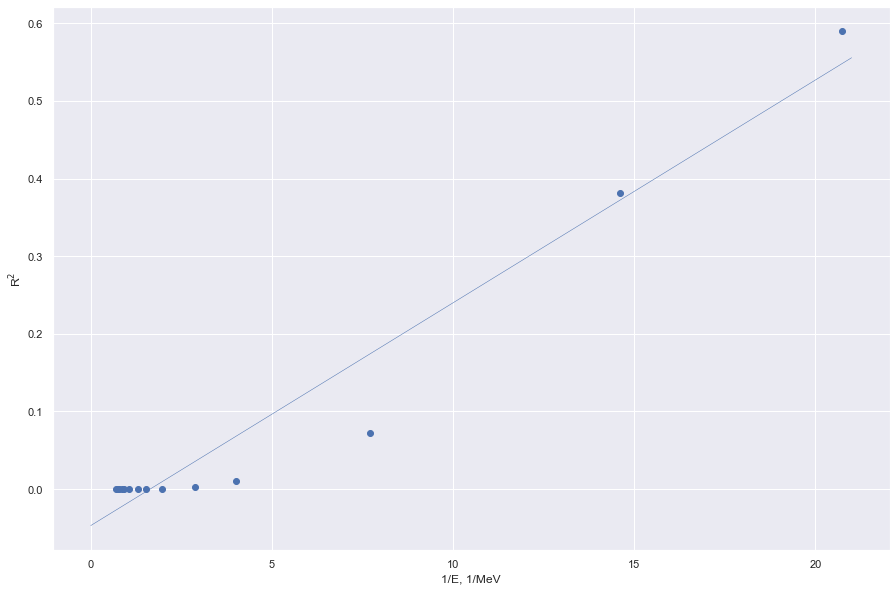

In [34]:
plt.scatter(E_, R_sq)

x = np.linspace(0, 21, 100)
a_, b_, s_, e_ = chi_sq(E_, R_sq, None)
y = a_ * x + b_
plt.plot(x, y, lw = 0.5)

plt.xlabel('1/E, 1/MeV')
plt.ylabel('R$^{2}$')

In [35]:
E_h = (200 - b)/a

In [36]:
E_h

0.09935206352155693

In [37]:
Er_co = 0.21
Er_cs = 0.1845
Er_na = 0.21
Em_na = (318 - b)/a
Em_cs = (370 - b)/a
Em_co = (230 - b)/a
Em = [Em_co, Em_cs, Em_na]
Er = [Er_co, Er_cs, Er_na]

In [45]:
Em

[0.12168527483798529, 0.22590692764798428, 0.1871960280328418]

In [46]:
Er

[0.21, 0.1845, 0.21]

Text(0, 0.5, 'Eобр, MeV')

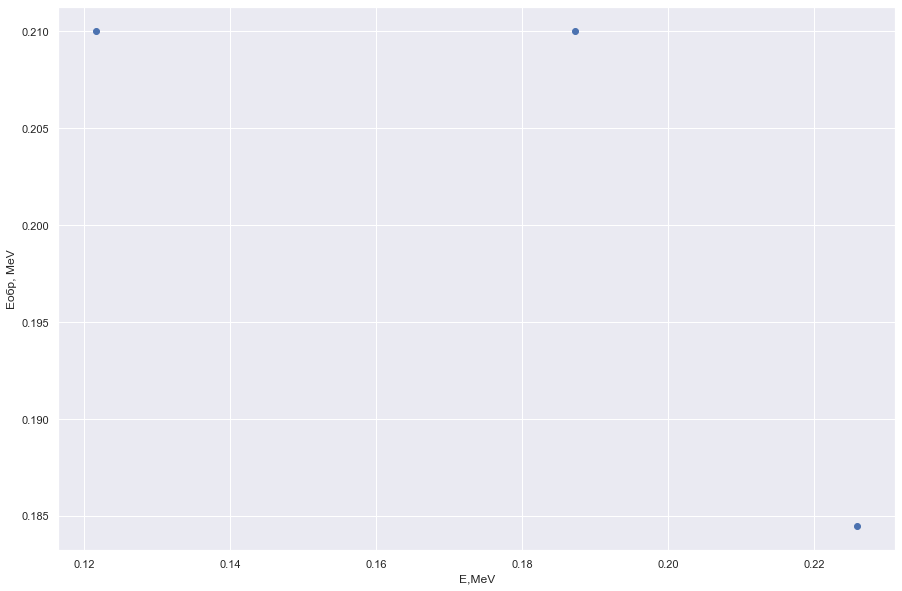

In [38]:
plt.scatter(Em, Er)
plt.xlabel('E,MeV')
plt.ylabel('Eобр, MeV')

In [39]:
m_co = 0.511 * 60
m_na = 0.511 * 22
m_cs = 0.511 * 137

Text(0, 0.5, 'E$_{theor}$')

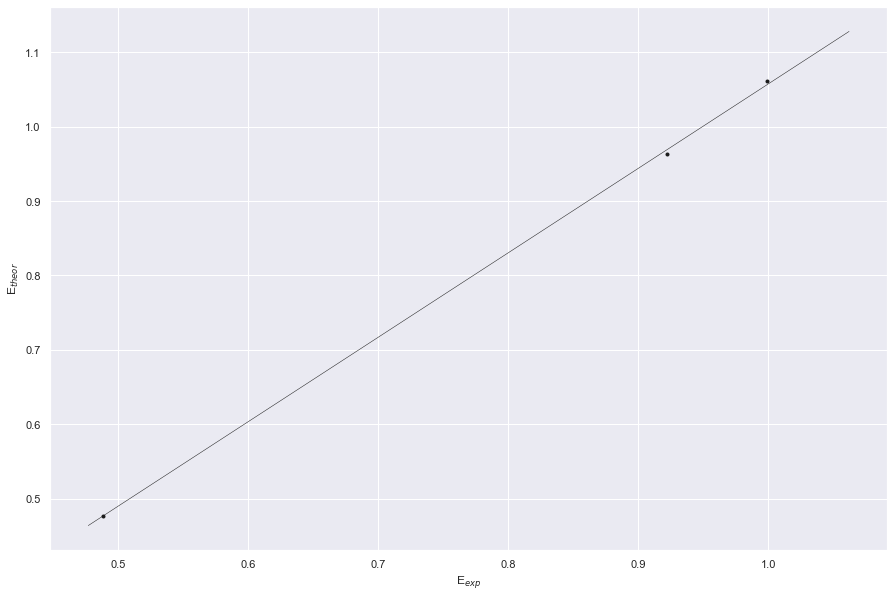

In [40]:
Ek_co = 0.922
Ek_cs = 0.488
Ek_na = 0.999 #exp
Ek_exp = [0.922, 0.488, 0.999]
Ek_t = [0.963, 0.477, 1.062 ]

plt.scatter(Ek_exp, Ek_t, marker = '.', color = 'k')

x = np.linspace(0.477, 1.062, 100)
a_, b_, s_, e_ = chi_sq(Ek_exp, Ek_t, None)
y = a_ * x + b_
plt.plot(x, y, lw = 0.5, color = 'k')

plt.xlabel('E$_{exp}$')
plt.ylabel('E$_{theor}$')


In [41]:
a_, b_, s_, e_

(1.1363091423750262,
 -0.07845624150922821,
 0.02108555741551114,
 0.017583505245558972)